# Methods Supplementary Information 2

## Seasonal amplitude and mean annual temperature

Seasonal variation varies predictably with mean annual temperatures.

Estimated from four salmon rivers across species range

In [2]:
#Load packages
require(dplyr)

Read in temperature time series data

In [5]:
#VESTURDALSA
#vest Temperature data
vestemp_nov<- read.csv("../Data/vestdaytempdata_novstart.csv") 
#Dates into date format YYYY/mm/dd
vestemp_nov$Date<-as.Date(vestemp_nov$Date, format="%d/%m/%Y") 
#fill gaps
vestemp_nov$meantemp<-ifelse(is.na(vestemp_nov$meantemp), vestemp_nov$meantemp_filled, vestemp_nov$meantemp)

#SELA
#Temperature data
selatemp_nov<- read.csv("../Data/seladaytemp.csv") 
#Dates into date format YYYY/mm/dd
selatemp_nov$Date<-as.Date(selatemp_nov$Date, format="%d/%m/%Y")
#fill gaps
selatemp_nov$meantemp<-ifelse(is.na(selatemp_nov$meantemp), selatemp_nov$meantemp_filled, selatemp_nov$meantemp)

#FROME
#read in frome temps
frometemps_decdates<-read.csv("../Data/frome_day_temps.csv")
#Dates into date format YYYY/mm/dd
frometemps_decdates$Date<- as.Date(frometemps_decdates$Date, format="%d/%m/%Y") 
#add missing temps
frometemps_decdates$meantemp<-ifelse(is.na(frometemps_decdates$meantemp), frometemps_decdates$meantemp_filled, frometemps_decdates$meantemp)

#PAS
#Temperature data
pastemp_dec<- read.csv("../Data/pas_day_temps.csv") 
#Dates into date format YYYY/mm/dd
pastemp_dec$Date<-as.Date(pastemp_dec$Date, format="%d/%m/%Y") 
#fill gaps
pastemp_dec$meantemp<-ifelse(is.na(pastemp_dec$meantemp), pastemp_dec$meantemp_filled, pastemp_dec$meantemp)

Funciton to fit sine wave to get amplitude out and visualise fit

In [6]:
#fit sine wave for amplitiude
sinefit<-function(y, t){

A<- (max(y)-min(y)/2)
C<-((max(y)+min(y))/2)

res1<- nls(y ~ A*sin((2*pi*t)/days-shift)+C, data=data.frame(t,y), start=list(A=A,C=C, days =365.25, shift=1))

co <- coef(res1)

fit <- function(x, a, d, e, f) {a*sin((2*pi*x)/d-e)+f}
# Plot result
plot(x=t, y=y)
curve(fit(x, a=co["A"], d=co["days"], e=co["shift"],f=co["C"]), add=TRUE ,lwd=2, col="steelblue")
 co["A"]
} 


In [7]:
#calculate annual mean temp
annualmeantemp<-function(tempdata){ #from time series
  test<-tempdata %>% group_by(year) %>% summarise(annual_mean_temp= mean(meantemp))
  result<-test %>%  summarise(annual_mean_temps= mean(annual_mean_temp))
  return(result$annual_mean_temps)
}

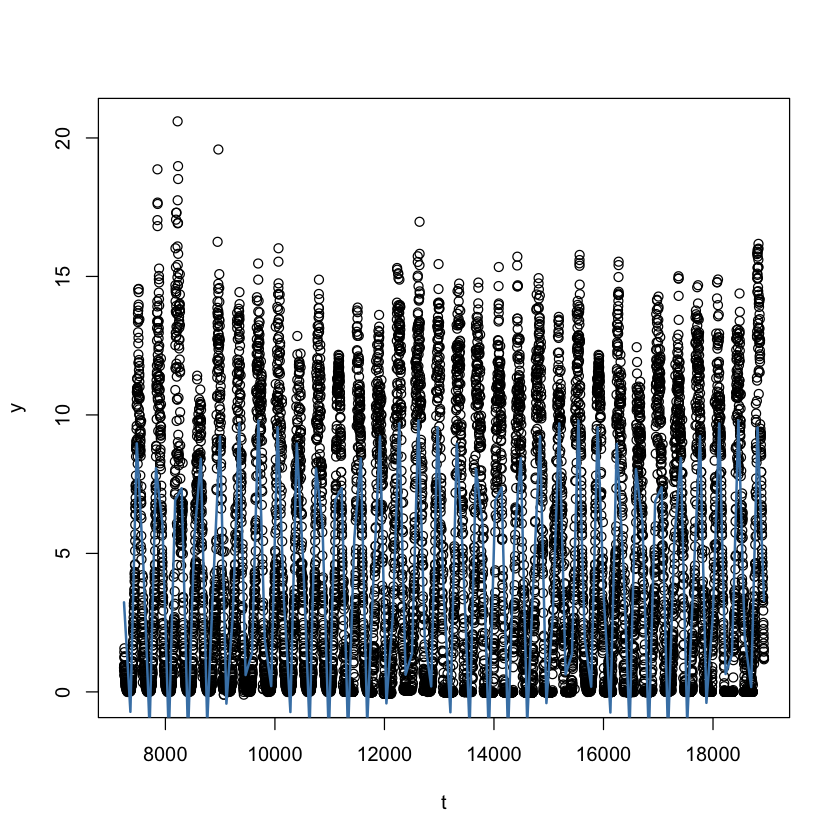

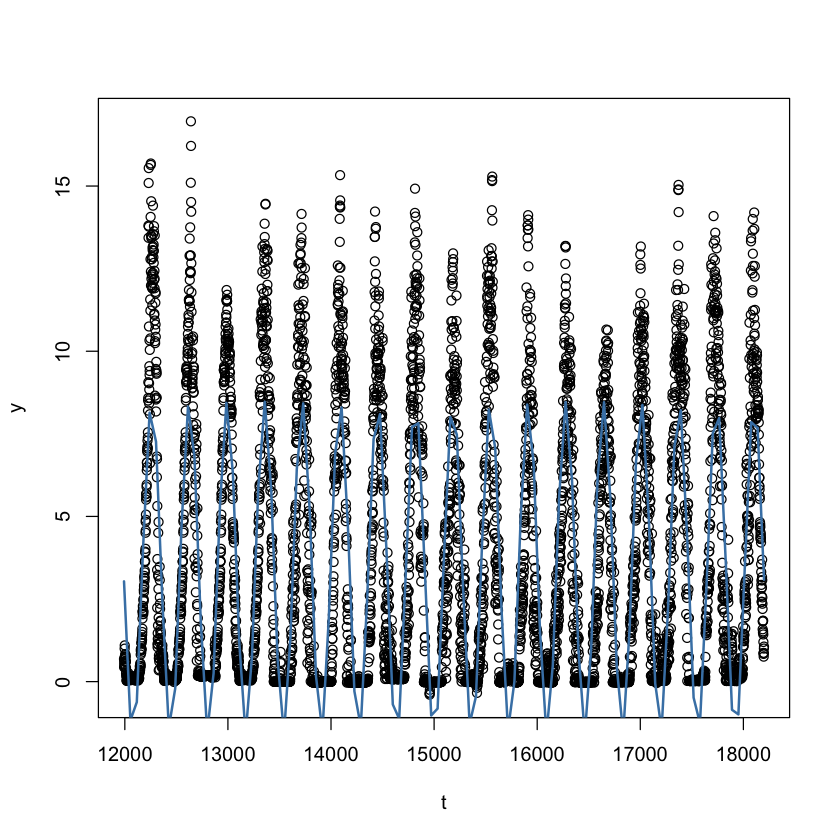

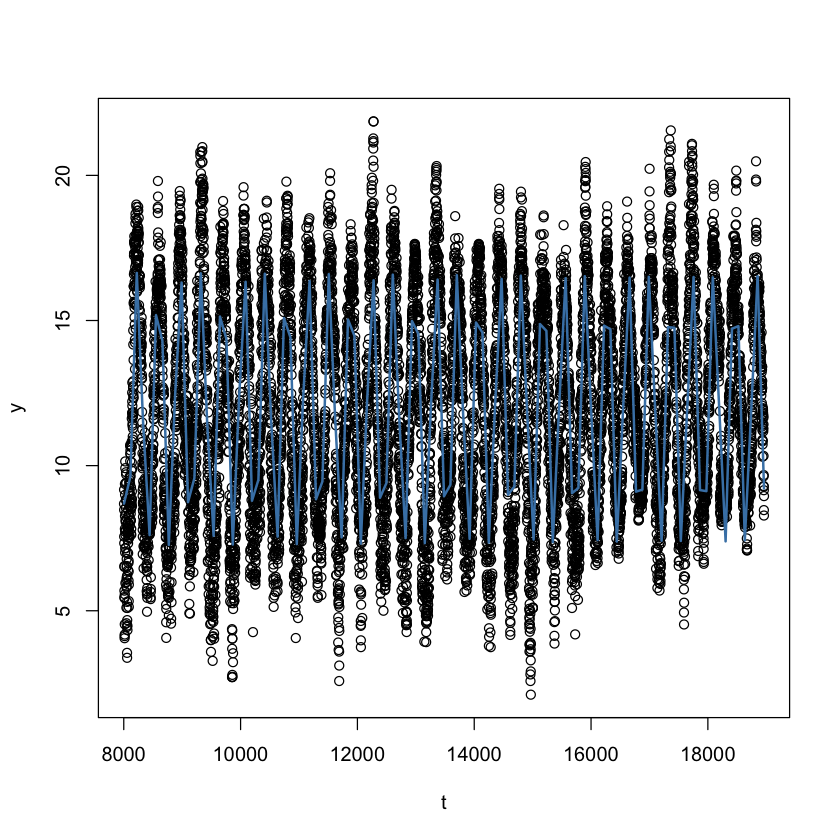

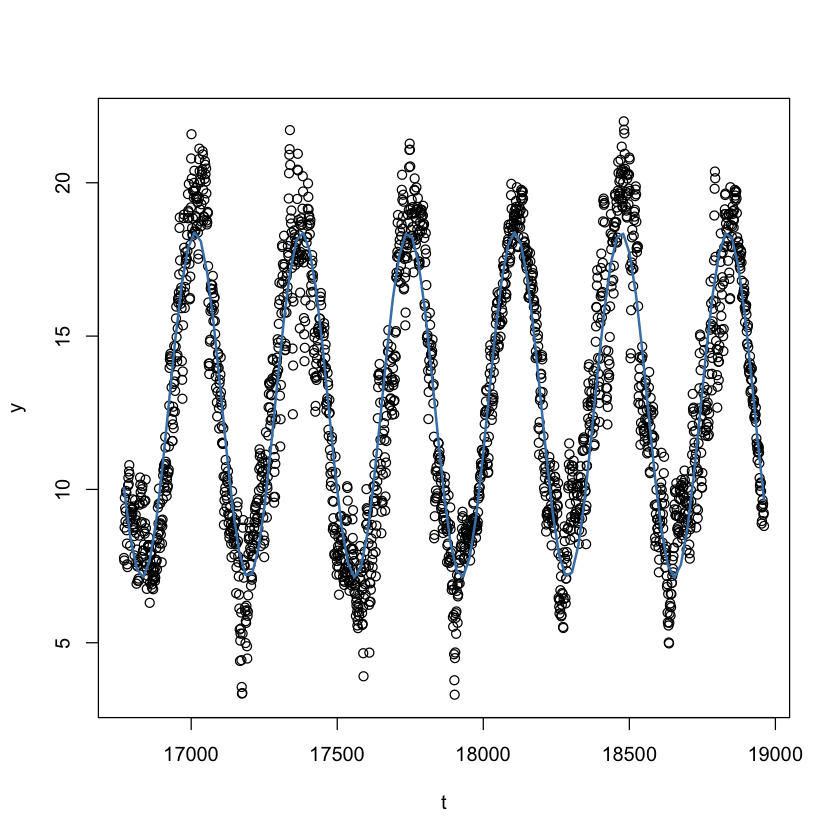

In [8]:
A<- c()
A[1]<-sinefit(y = vestemp_nov$meantemp, t = as.numeric(vestemp_nov$Date))
A[2]<-sinefit(y = selatemp_nov$meantemp, t = as.numeric(selatemp_nov$Date))
A[3]<-sinefit(y = frometemps_decdates$meantemp, t = as.numeric(frometemps_decdates$Date))
A[4]<-sinefit(y = pastemp_dec$meantemp, t = as.numeric(pastemp_dec$Date))

In [9]:
AMT<-c()
AMT[1]<-annualmeantemp(vestemp_nov)
AMT[2]<-annualmeantemp(selatemp_nov)
AMT[3]<-annualmeantemp(frometemps_decdates)
AMT[4]<-annualmeantemp(pastemp_dec)

In [10]:
AmpData<-data.frame(A,AMT)


Call:
lm(formula = A ~ AMT, data = AmpData)

Coefficients:
(Intercept)          AMT  
     5.4265      -0.0163  


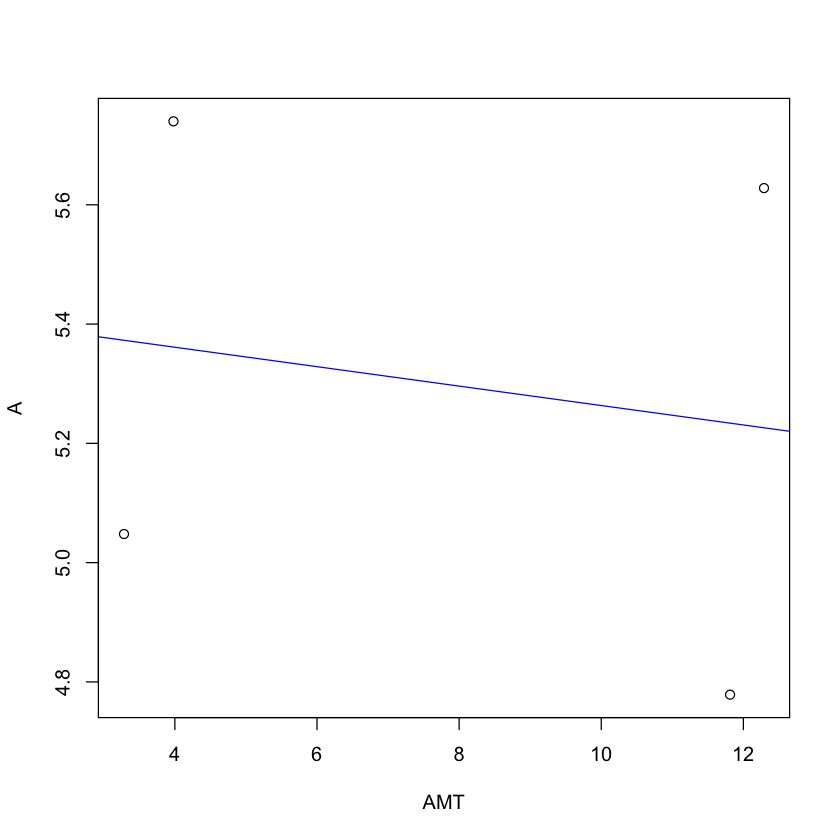

In [12]:
plot(A~AMT, data = AmpData)
amp_fit<-lm(A~AMT, data = AmpData)
amp_fit
abline(amp_fit, col = "blue")

In [13]:
summary(amp_fit)


Call:
lm(formula = A ~ AMT, data = AmpData)

Residuals:
      1       2       3       4 
 0.3783 -0.3250 -0.4553  0.4019 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  5.42650    0.58629   9.256   0.0115 *
AMT         -0.01630    0.06584  -0.248   0.8275  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5557 on 2 degrees of freedom
Multiple R-squared:  0.02975,	Adjusted R-squared:  -0.4554 
F-statistic: 0.06132 on 1 and 2 DF,  p-value: 0.8275


Visualise an example, with mean tempertaure of 3 degrees Celsius

In [14]:
#amplitude as a function of meantemp
amplitude_func<- function(meantemp, x = coef(amp_fit)[1], y = coef(amp_fit)[2]){
 amp<-( y * meantemp) + x
 return(amp)
}

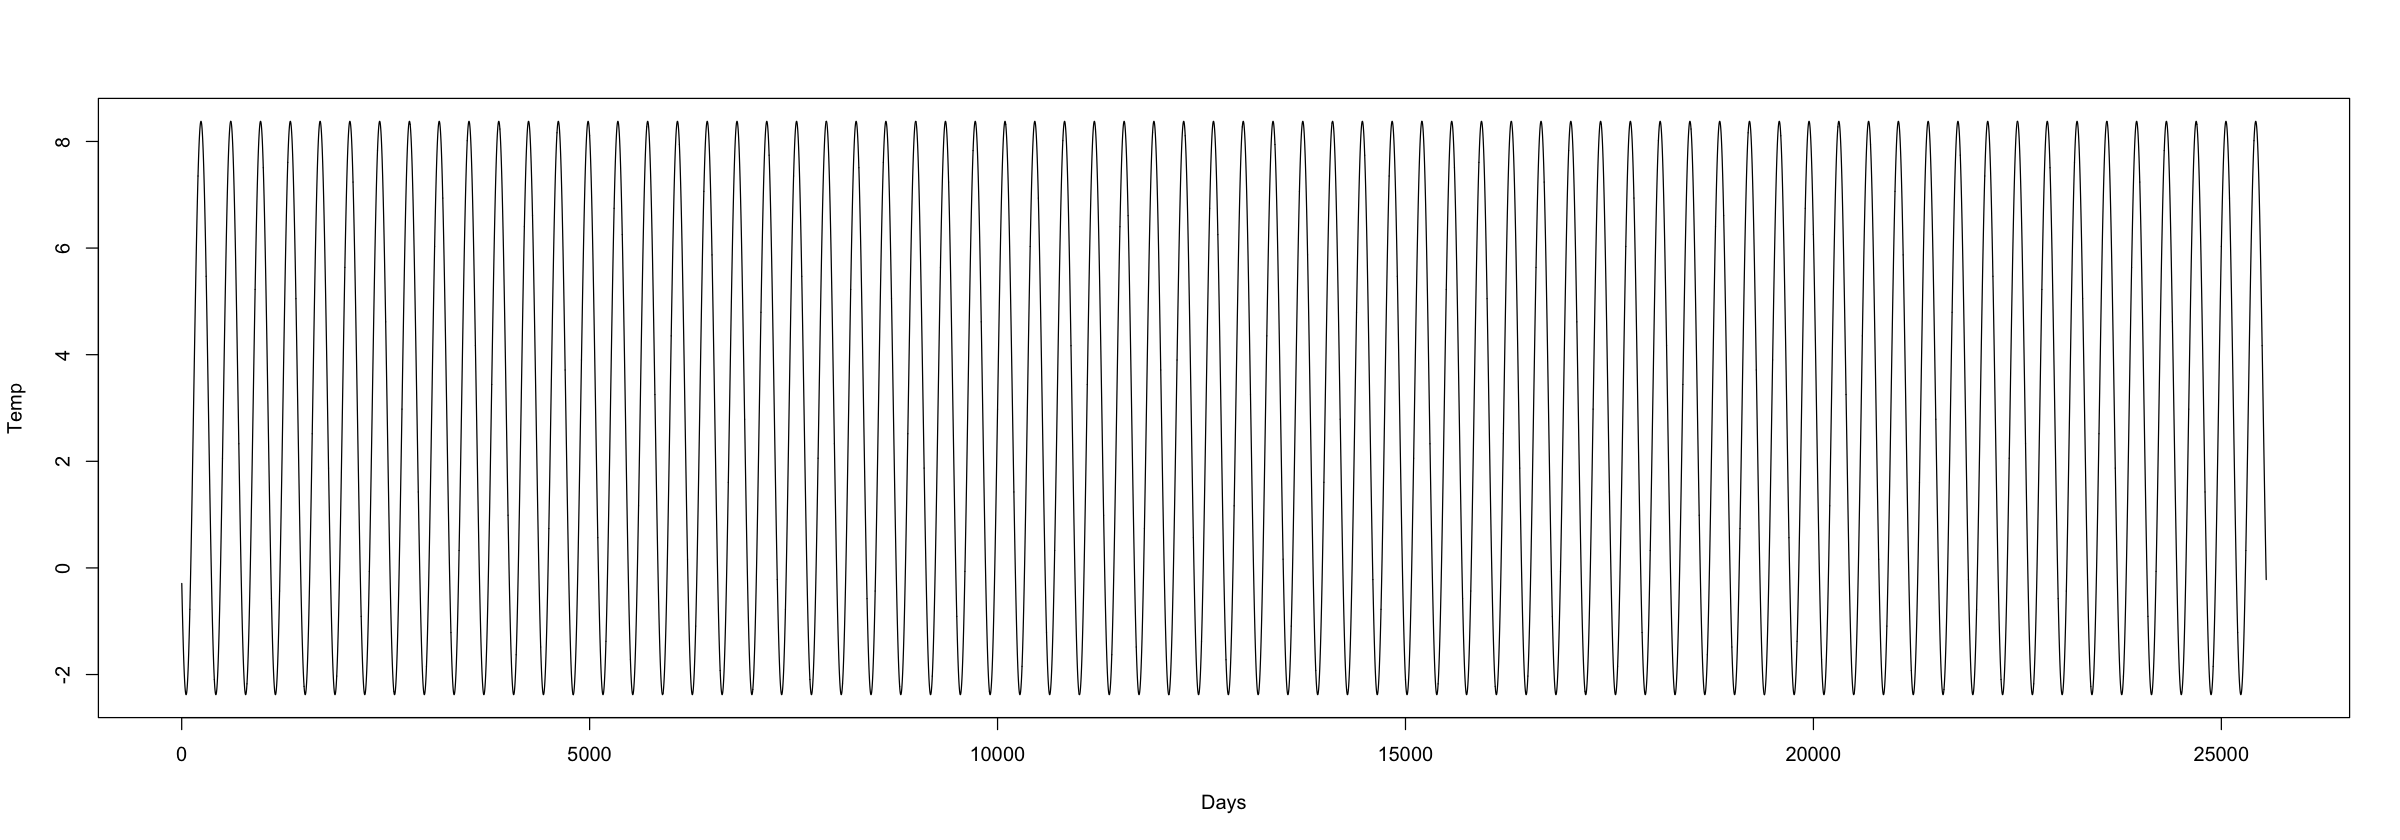

In [15]:
options(repr.plot.width=20, repr.plot.height=7) 

meantemp = 3

sine_x<- seq(1, 365*70, by = 1)
sine_data<-as.data.frame(sine_x)
sine_y<- (amplitude_func(meantemp))*sin((2*pi*sine_x)/365-2.5)+meantemp
sine_data$sine_y <- sine_y

plot(sine_x,sine_y,type="l", ylab = "Temp", xlab = "Days")